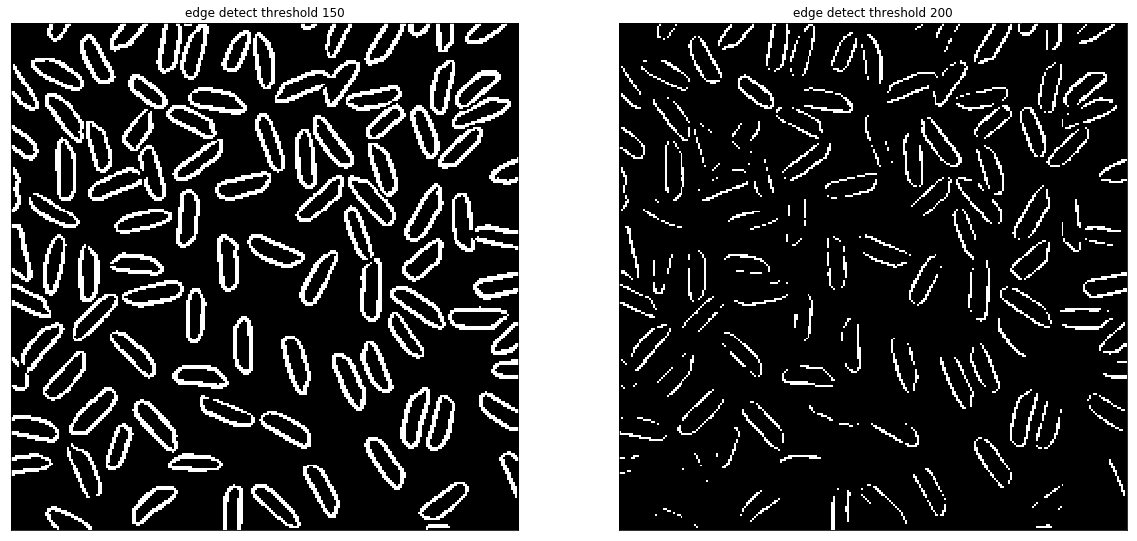

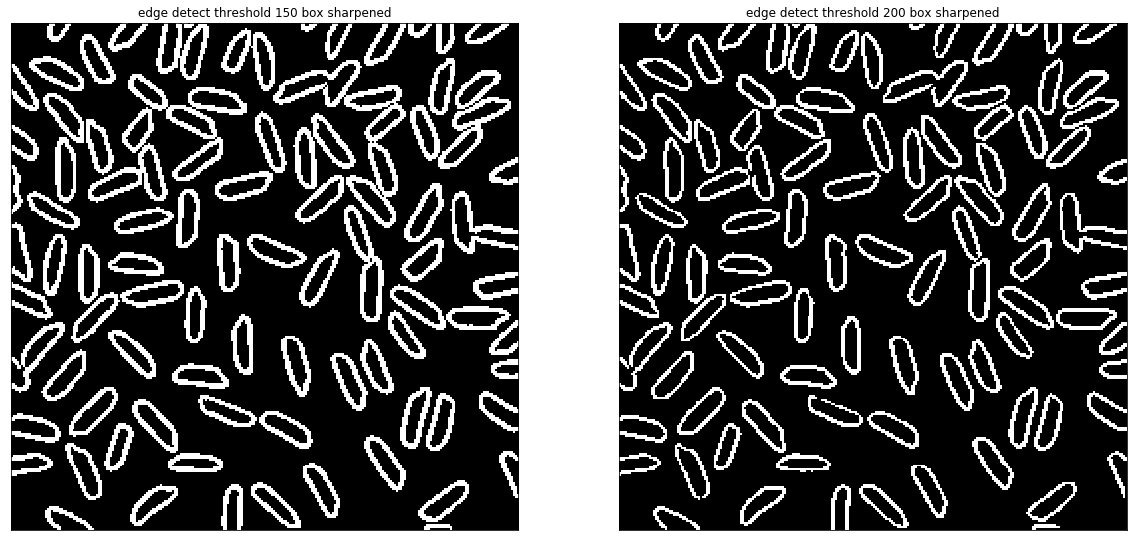

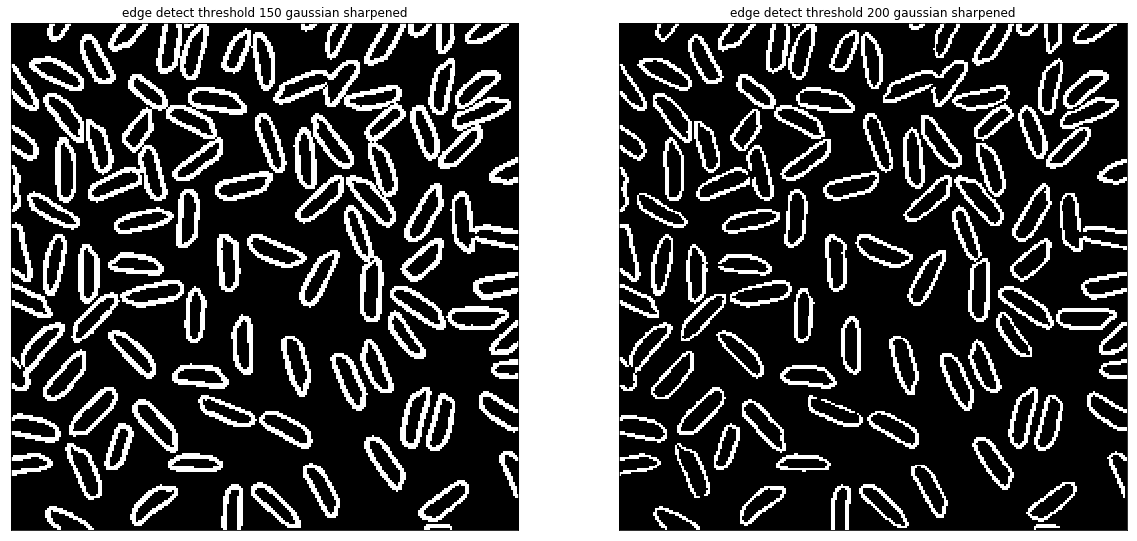

In [31]:
import cv2
import numpy as np
import skimage.measure
import matplotlib.pyplot as plt

#import the image in greyscale
image_path = "rice.png"

image1 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#perform the sobel x and y calculations
sobelX = cv2.Sobel(image1, cv2.CV_64F, 1, 0, ksize=3)
sobelY = cv2.Sobel(image1, cv2.CV_64F, 0, 1, ksize=3)

#get magnitude of the sobel x and y
magnitude = cv2.magnitude(sobelX, sobelY)

#set size of image array
rows = 256;
collumns = 256;

edgeDetect1 = magnitude
edgeDetect2 = magnitude

#perform thresholding on the two images using a binary threshold from the given value (either 150 or 200) and 255
ret,thresh1 = cv2.threshold(edgeDetect1,150,255,cv2.THRESH_BINARY)

            
ret,thresh2 = cv2.threshold(edgeDetect2,200,255,cv2.THRESH_BINARY)
            
            
#perform box filtering
kernel = np.ones((5,5), np.float32)/(5*5)
res1 = cv2.filter2D(image1, -1, kernel)

#perform gaussian filtering
res2 = cv2.GaussianBlur(image1, (5,5), 2)

#use formula given to get the "details" of both of the images
details1 = image1 - res1
details2 = image1 - res2

#use the given formula to get the sharpened images
sharpImage1 = image1 + details1
sharpImage2 = image1 + details2

#perfporm sobel filtering on box filtered image
sobelX = cv2.Sobel(sharpImage1, cv2.CV_64F, 1, 0, ksize=3)
sobelY = cv2.Sobel(sharpImage1, cv2.CV_64F, 0, 1, ksize=3)

#get sobel magnitude
sharpMagnitude1 = cv2.magnitude(sobelX, sobelY)


#perfporm sobel filtering on gaussian filtered image
sobelX = cv2.Sobel(sharpImage2, cv2.CV_64F, 1, 0, ksize=3)
sobelY = cv2.Sobel(sharpImage2, cv2.CV_64F, 0, 1, ksize=3)

#get sobel magnitude
sharpMagnitude2 = cv2.magnitude(sobelX, sobelY)


edgeDetectSharp1 = sharpMagnitude1
edgeDetectSharp2 = sharpMagnitude1

edgeDetectSharp3 = sharpMagnitude2
edgeDetectSharp4 = sharpMagnitude2


#perform thresholding on the four images created from sharpened images using a binary threshold from the given value (either 150 or 200) and 255
ret,thresh3 = cv2.threshold(edgeDetectSharp1,150,255,cv2.THRESH_BINARY)

            
ret,thresh4 = cv2.threshold(edgeDetectSharp2,200,255,cv2.THRESH_BINARY)


ret,thresh5 = cv2.threshold(edgeDetectSharp3,150,255,cv2.THRESH_BINARY)

            
ret,thresh6 = cv2.threshold(edgeDetectSharp4,200,255,cv2.THRESH_BINARY)


#plot all six edge detection images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(thresh1, cmap="gray")
plt.title("edge detect threshold 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh2, cmap="gray")
plt.title("edge detect threshold 200"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(thresh3, cmap="gray")
plt.title("edge detect threshold 150 box sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh4, cmap="gray")
plt.title("edge detect threshold 200 box sharpened"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(thresh5, cmap="gray")
plt.title("edge detect threshold 150 gaussian sharpened"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh6, cmap="gray")
plt.title("edge detect threshold 200 gaussian sharpened"), plt.xticks([]), plt.yticks([])

plt.show()

As can be seen in the above images, the sharpened images seem to ahve more success than the unsharpened ones especially when there is a high threshold as those images seem to still edge detect well.

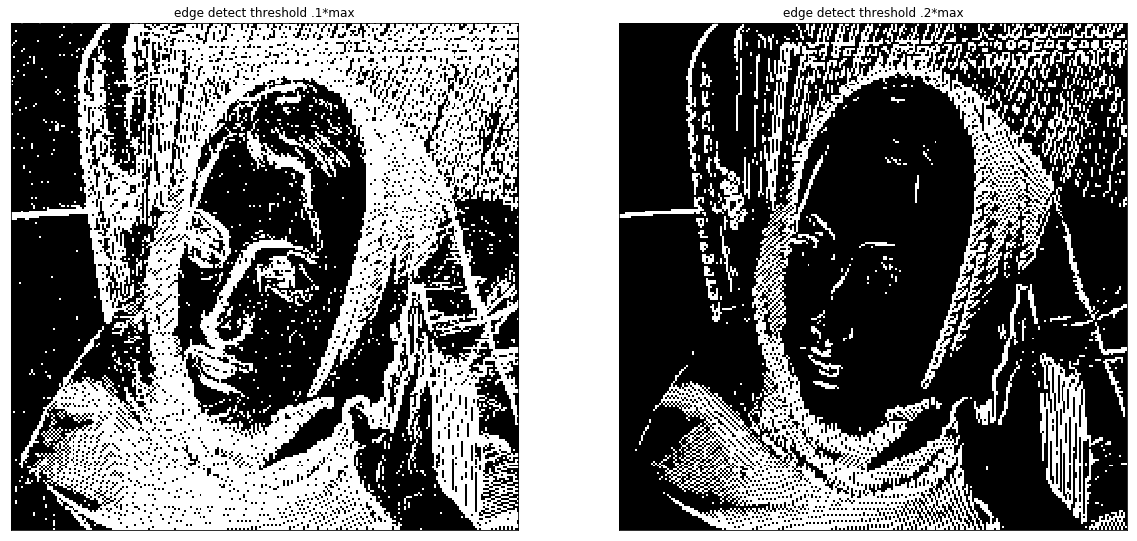

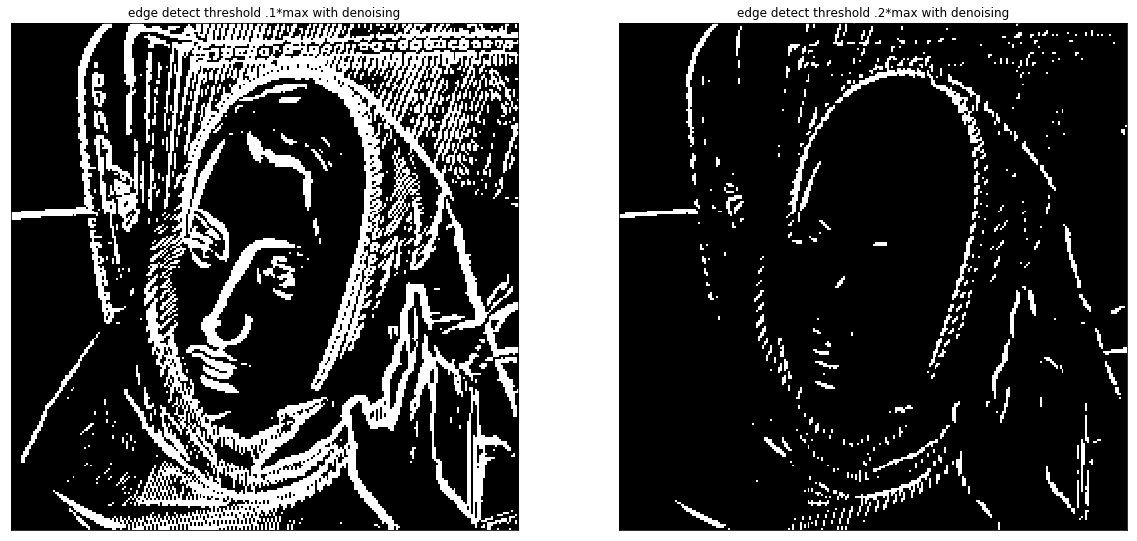

In [25]:
image_path = "woman.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#perform the sobel x and y calculations
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

#get magnitude of the sobel x and y
magnitude = cv2.magnitude(sobelX, sobelY)

#set size of image array
rows = 256;
collumns = 256;

currentPixelMax = 0;
currentPxel = 0;

for i in range (0,rows):
    for j in range (0,collumns):
        if magnitude[i,j] > currentPixelMax:
            currentPixelMax = magnitude[i,j]
            
thresholdOne = currentPixelMax*.1

thresholdTwo = currentPixelMax*.2

edgeDetect1 = magnitude
edgeDetect2 = magnitude

ret,thresh1 = cv2.threshold(edgeDetect1,thresholdOne,255,cv2.THRESH_BINARY)
            
ret,thresh2 = cv2.threshold(edgeDetect2,thresholdTwo,255,cv2.THRESH_BINARY)
            
#perform box filtering
kernel = np.ones((3,3), np.float32)/(3*3)
res = cv2.filter2D(image, -1, kernel)

#perform the sobel x and y calculations
sobelX = cv2.Sobel(res, cv2.CV_64F, 1, 0, ksize=3)
sobelY = cv2.Sobel(res, cv2.CV_64F, 0, 1, ksize=3)

#get magnitude of the sobel x and y
magnitude1 = cv2.magnitude(sobelX, sobelY)

edgeDetect3 = magnitude1
edgeDetect4 = magnitude1

currentPixel = 0;

ret,thresh3 = cv2.threshold(edgeDetect3,thresholdOne,255,cv2.THRESH_BINARY)

ret,thresh4 = cv2.threshold(edgeDetect4,thresholdTwo,255,cv2.THRESH_BINARY)

            
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(thresh1, cmap="gray")
plt.title("edge detect threshold .1*max"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh2, cmap="gray")
plt.title("edge detect threshold .2*max"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(thresh3, cmap="gray")
plt.title("edge detect threshold .1*max with denoising"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh4, cmap="gray")
plt.title("edge detect threshold .2*max with denoising"), plt.xticks([]), plt.yticks([])

plt.show()

As can be seen in the images above, in the case where the threshold was put at a low value and thus many edges/noise edges will come through, the use of the denoising aides greately in the creation of an edge detection image.
However, in the case that the threshold is high and thus the edges are not clear, the denoising has the effect of muddying the image to the point where it doesn't create a good edge detection image.